1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность<br>
<br>
Подключаем библиотеки и загружаем датасет:

In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Нормируем данные:

In [4]:
input_shape = (28, 28, 1)
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

На уроке построили 4 модели:
1. Один свёрточный слой.
2. Без свёрточного слоя.
3. Два свёрточных слоя.
4. Три свёрточных слоя.<br><br>
Получили:

In [ ]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [ ]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 41s 21ms/step - loss: 0.4157 - accuracy: 0.8535 - val_loss: 0.3270 - val_accuracy: 0.8856
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2825 - accuracy: 0.8996 - val_loss: 0.2941 - val_accuracy: 0.8924
Epoch 3/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2410 - accuracy: 0.9107 - val_loss: 0.2883 - val_accuracy: 0.8973
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2126 - accuracy: 0.9220 - val_loss: 0.2549 - val_accuracy: 0.9083
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1861 - accuracy: 0.9309 - val_loss: 0.2552 - val_accuracy: 0.9101
CPU times: user 4min 35s, sys: 8.74 s, total: 4min 43s
Wall time: 3min 16s


In [ ]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [ ]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5359 - accuracy: 0.8136 - val_loss: 0.4484 - val_accuracy: 0.8436
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4114 - accuracy: 0.8546 - val_loss: 0.4148 - val_accuracy: 0.8537
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3716 - accuracy: 0.8661 - val_loss: 0.3987 - val_accuracy: 0.8585
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3456 - accuracy: 0.8752 - val_loss: 0.3820 - val_accuracy: 0.8643
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3266 - accuracy: 0.8805 - val_loss: 0.3757 - val_accuracy: 0.8666
CPU times: user 32.3 s, sys: 3.64 s, total: 35.9 s
Wall time: 42 s


In [ ]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [ ]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4147 - accuracy: 0.8524 - val_loss: 0.3187 - val_accuracy: 0.8840
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2718 - accuracy: 0.9015 - val_loss: 0.2780 - val_accuracy: 0.8990
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2276 - accuracy: 0.9172 - val_loss: 0.2607 - val_accuracy: 0.9054
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1978 - accuracy: 0.9264 - val_loss: 0.2625 - val_accuracy: 0.9049
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1733 - accuracy: 0.9365 - val_loss: 0.2404 - val_accuracy: 0.9159
CPU times: user 42.6 s, sys: 4.27 s, total: 46.9 s
Wall time: 1min 23s


In [ ]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [ ]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data =(x_test, y_test_cat) )


Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4291 - accuracy: 0.8435 - val_loss: 0.3278 - val_accuracy: 0.8839
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2735 - accuracy: 0.9000 - val_loss: 0.2661 - val_accuracy: 0.9024
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2299 - accuracy: 0.9160 - val_loss: 0.2419 - val_accuracy: 0.9134
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2010 - accuracy: 0.9256 - val_loss: 0.2494 - val_accuracy: 0.9125
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1733 - accuracy: 0.9362 - val_loss: 0.2477 - val_accuracy: 0.9178
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1509 - accuracy: 0.9430 - val_loss: 0.2517 - val_accuracy: 0.9147
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1308 - accuracy: 0.9504 - val_loss: 0.2432 - val_accurac

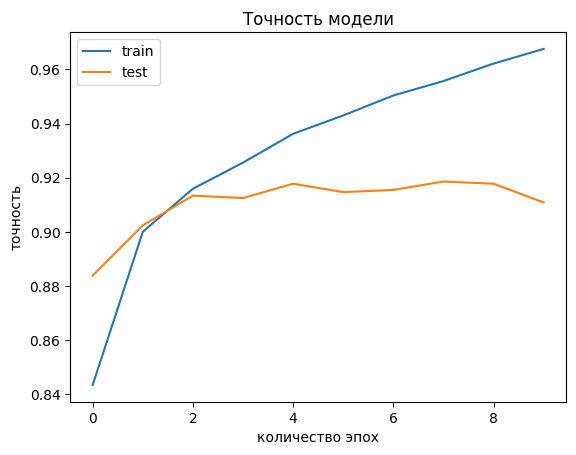

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

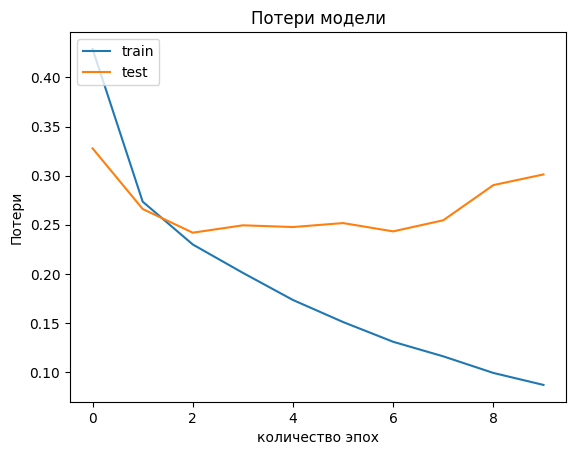

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1. Таким образом получили, что модель без свёртки - самая простая - имеет самую малую точность. <br>
2. Три остальные модели практически одной точности, первая модель на десятые доли процента уступает третьей и четвёртой.<br>
3. Четвёртая модель показала, что достаточно 6-8 эпох - дальше заметно переобучение.

Попробуем улучшить результат.

In [ ]:
model_best = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(256, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(512, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(),
      Dense(512,activation = 'relu'),
      Dense(64,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [ ]:
model_best.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_best.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_data =(x_test, y_test_cat) )

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3903 - accuracy: 0.8566 - val_loss: 0.2899 - val_accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2471 - accuracy: 0.9088 - val_loss: 0.2482 - val_accuracy: 0.9097
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2017 - accuracy: 0.9255 - val_loss: 0.2338 - val_accuracy: 0.9144
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1691 - accuracy: 0.9375 - val_loss: 0.2410 - val_accuracy: 0.9163
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1425 - accuracy: 0.9470 - val_loss: 0.2366 - val_accuracy: 0.9167
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1193 - accuracy: 0.9553 - val_loss: 0.2420 - val_accuracy: 0.9240
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1020 - accuracy: 0.9625 - val_loss: 0.2537 - val_ac

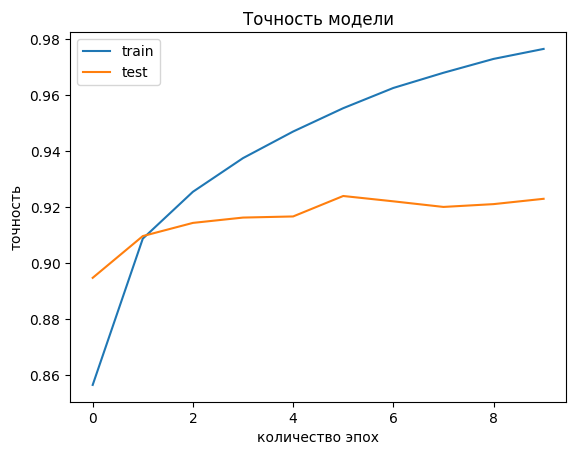

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

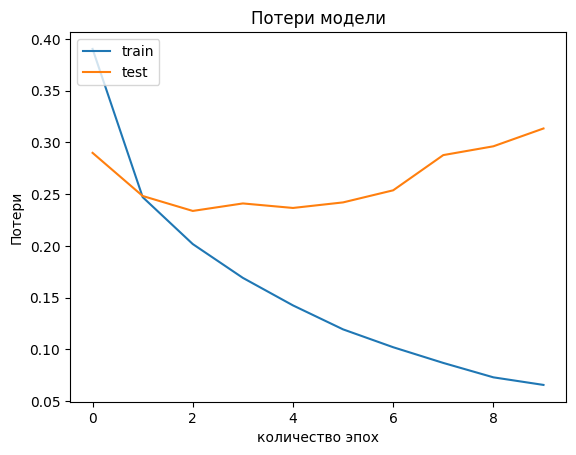

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Улучшить результат удалось незначительно - точность выросла на десятые доли процета по сравнению с моделью 4, при этом потери также сократился на десятые доли процента. Максимальная точность где-то между 3 и 6 эпохами.

2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow, неразобранные на уроке

Не совсем понял про документацию TensorFlow 2, но вот сверх урока:



In [8]:
import tensorflow as tf # импортируем TensorFlow

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # именуем категории

In [27]:
predictions = model_best.predict(x_test) # Предсказание значений из тестовой выборки
predictions[0] # предсказание нулевого элемента

313/313 [==============================] - 4s 13ms/step


array([7.0212792e-07, 1.4302209e-08, 2.8386216e-08, 5.6610622e-07,
       2.2754314e-07, 2.2938730e-05, 4.9678761e-07, 3.4575872e-04,
       6.9983059e-08, 9.9962920e-01], dtype=float32)

Подсчитаем количество и найдём номера неправильно предсказанных элементов

In [28]:
n=0
num = []
for i in range(0,9999):
  if np.argmax(predictions[i]) != y_test[i]:
    n+=1
    num.append(i)
n

938

In [29]:
num[:15] # номера первых 15 неправильно предсказанных элементов

[23, 25, 42, 49, 66, 67, 68, 74, 103, 117, 135, 136, 141, 147, 150]

Функции отрисовки картинки и весовых значений предсказания:

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
  100*np.max(predictions_array),
  class_names[true_label]),
  color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Выведем первых 15 предсказанных элементов из тестовой выборки:

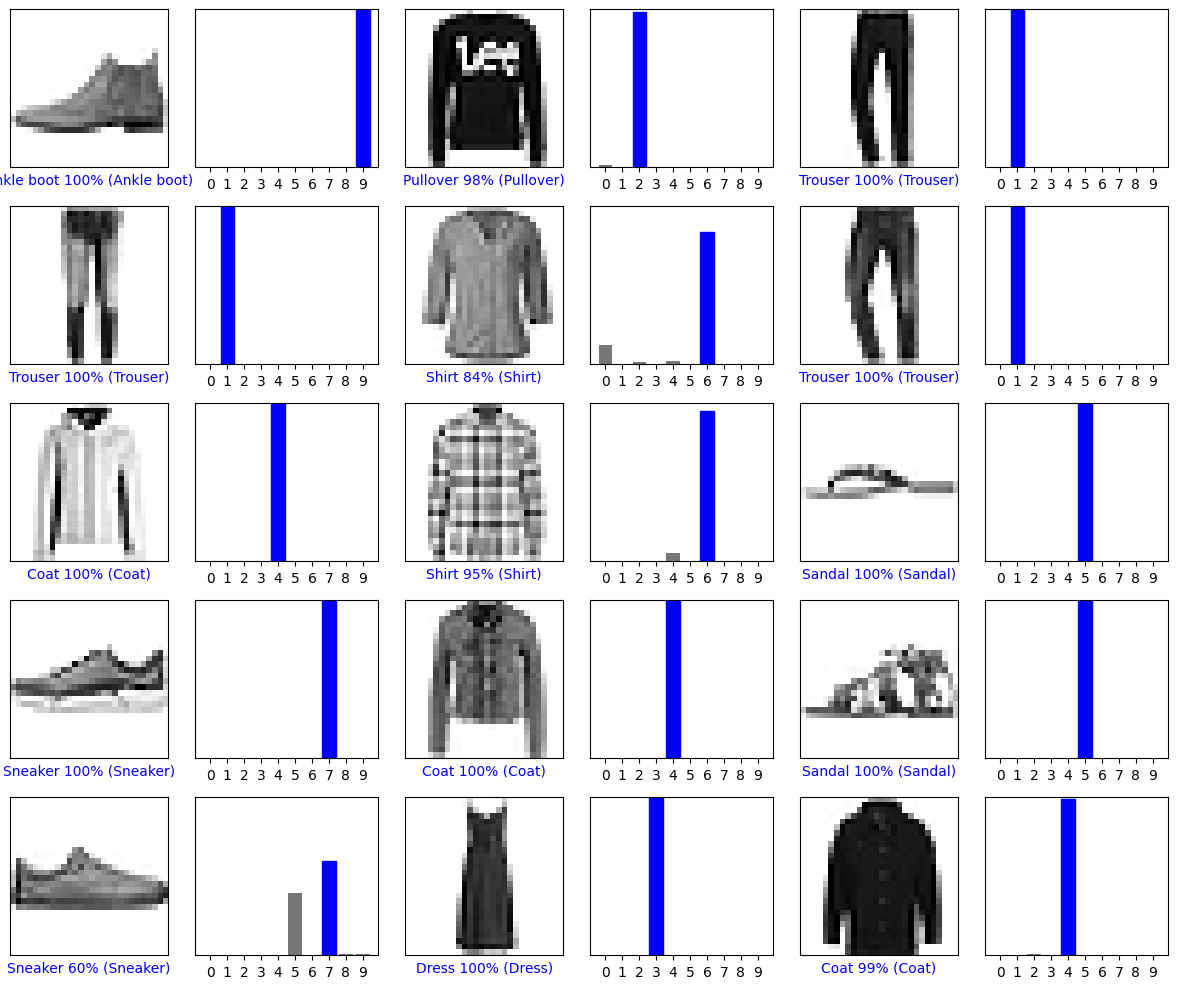

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Выведем первых 15 неправильно предсказанных элементов из тестовой выборки:

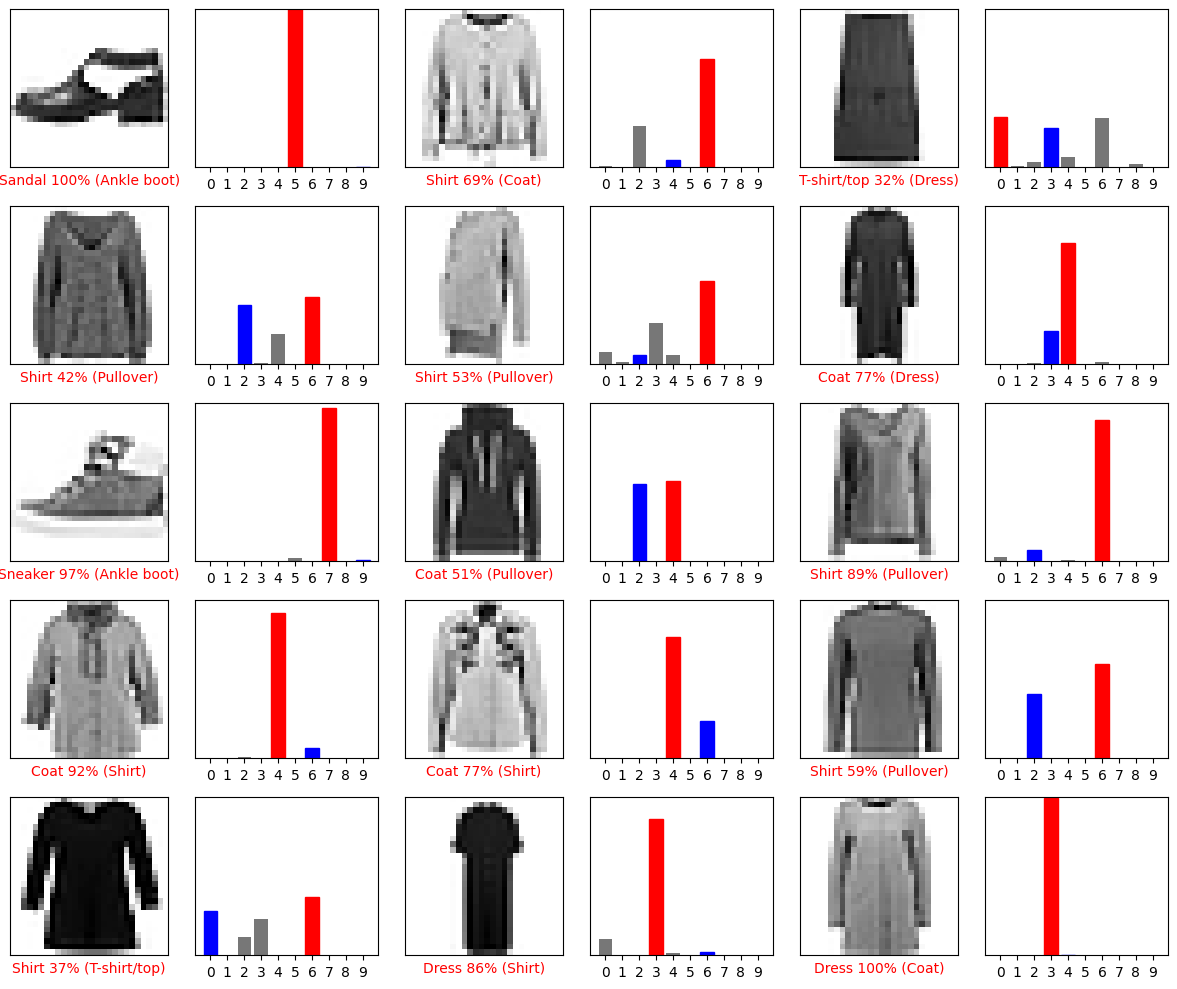

In [35]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(num[i], predictions[num[i]], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(num[i], predictions[num[i]], y_test)
plt.tight_layout()
plt.show()

Печать весов предсказания первого элемента и их вывод в виде диаграммы с поименованной подписью категорий:

[1.3326457e-02 1.4087030e-07 9.8366362e-01 1.7713866e-04 1.5378981e-03
 8.7048456e-08 1.2943152e-03 3.0512251e-09 1.4675963e-07 8.7174392e-08]


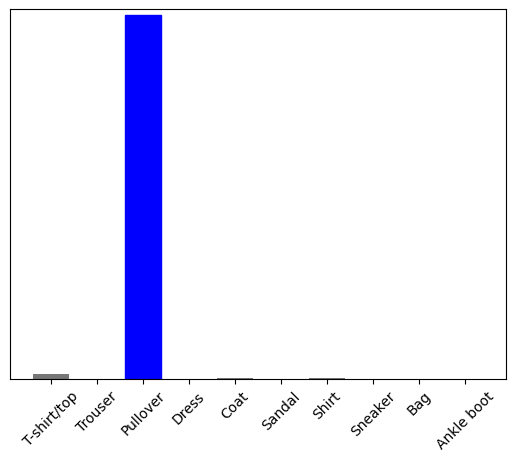

In [44]:
predictions_single = predictions[1]
print(predictions_single)
plot_value_array(1, predictions_single, y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [57]:
model_best.save_weights('model_best_weight.h5') # Запись весов модели

In [59]:
model_best.save('model_best.h5') # Запись архитектуры модели, веса и конфигурации обучения

Интересный момент - как определить что сохранено - веса или вся модель, если предлагается сохранять в файлы с одинаковым расширением.

In [ ]:
model_best.load_weights('model_best.h5') # Загрузка "весов" в модель

In [47]:
print(np.argmax(predictions[:5], axis=1)) # Печать первых 5 предсказанных значений из тестового набора

[9 2 1 1 6]


In [51]:
print(y_test[:5]) # Печать первых 5 правильных значений из тестового набора

[9 2 1 1 6]


Из документации TensorFlow 2 - упрощённое описание умножения.

In [53]:
a = tf.constant(5)
b = tf.constant(3)
c = a * b
print(c)

tf.Tensor(15, shape=(), dtype=int32)
